# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
white = data[data["race"] == "w"]["call"]
black = data[data["race"] == "b"]["call"]

print(white.sum(), "of", len(white), "were called back, or", white.sum()/len(white), "%")
print(white.sum(), "of", len(black), "were called back, or", black.sum()/len(black), "%")

235.0 of 2435 were called back, or 0.0965092402464 %
235.0 of 2435 were called back, or 0.064476386037 %


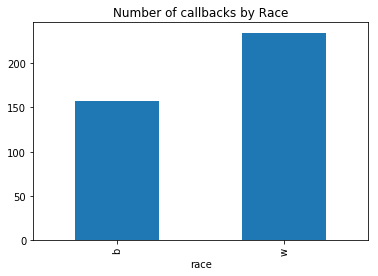

In [6]:
data.groupby("race").sum()["call"].plot(kind="bar")
plt.title("Number of callbacks by Race")
plt.xlabel("race")
plt.show()

## 1. What test is appropriate for this problem? Does CLT apply?

The goal is to discern whether the observed difference between the proportions of resume-callbacks generated by resumes of white and black sounding names is statistically significant. A Chi-quared goodness of fit test can be used to evaluate the null hypothesis that the callback probabilities are the same across race-names. The Chi-squared test is a derivation of the CLT, and thus must meet the following criteria:

 - Simple Random Sample
 - Independence
 - Sample size
 
Because the names are randomly assigned, each resume is independently evaluated by employers, and the saple size is greater than 30, the CLT conditions are met and the CLT does apply. In a Chi-Squared test, a Chi-Squared statistic is compared to the chi-squared distribution for the relevant degrees of freedom. From this, a P value is calculated.

## 2. What are the null and alternate hypotheses?

Null Hypothesis: There is no significant difference between proportions of callbacks between white and black-sounding names

Alternative Hypothesis: There is significant difference between proportions of callbacks between white and black-sounding names

Significance: 0.05

In [7]:
#organize the sumamry data
df = pd.DataFrame(data={'white': [white.count()-white.sum(), white.sum()], 'black': [black.count()-black.sum(), black.sum()]})

In [8]:
df

,black,white
0,2278.0,2200.0
1,157.0,235.0


In [9]:
#prepare values for chi-squared_Stat calculation
observed = df["black"]
expected_ratio = df["white"]/len(white)
expected = expected_ratio * len(black)

chi_squared_stat = (((observed - expected)**2) / expected).sum()
print(chi_squared_stat)

28.654816247582204


In [10]:
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=28.654816247582204, pvalue=8.6498591362764807e-08)

## 3. Compute margin of error, confidence interval, and p-value.

A T-Test would give these values, but instead I've used a Chi-Squared test. The P-Value here is 8.64e-08

## 4. Write a story describing the statistical significance in the context or the original problem.

The Chi-squared test provides a chi-squared value of 28. That's very large. A P value of 8.64e-08 is also given. That's very small. Much smaller than the 0.05 significance required to retain the null hypothesis. Thus, the null hypothesis is rejected. To illustrate just how this test works, a graph is included below. The area under the blue curve to the right of the vertical red line represents the likelihood of observing the given data if the null hypothesis were true. Pretty slim!

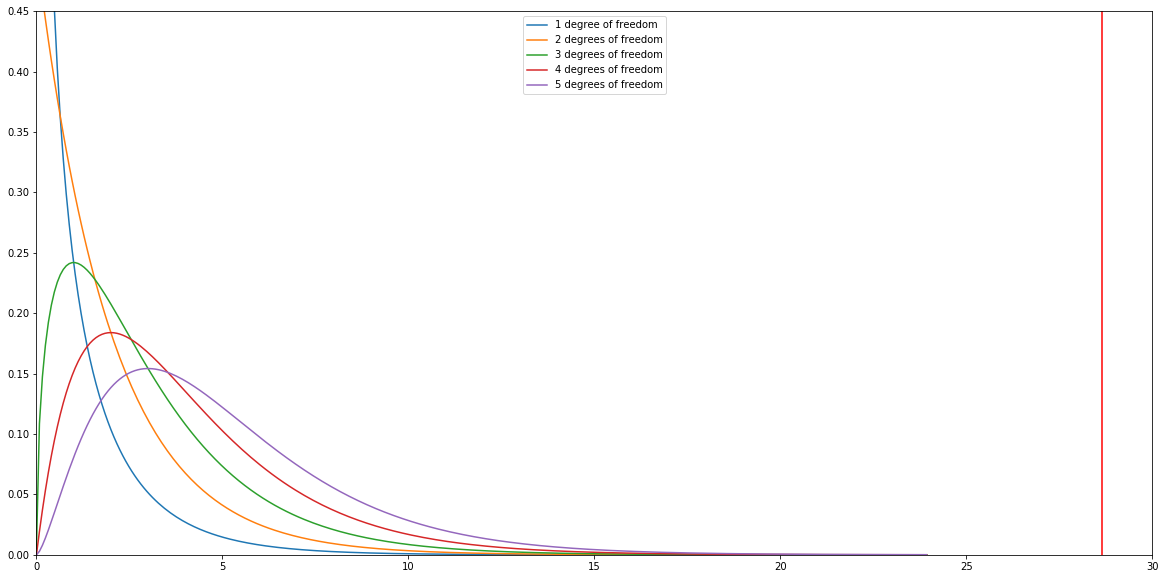

In [11]:
df = 1

x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.999999, df), 300)

plt.figure(figsize=(20,10))

plt.plot(x, stats.chi2.pdf(x, df), label="1 degree of freedom")
plt.plot(x, stats.chi2.pdf(x, 2), label="2 degrees of freedom")
plt.plot(x, stats.chi2.pdf(x, 3), label="3 degrees of freedom")
plt.plot(x, stats.chi2.pdf(x, 4), label="4 degrees of freedom")
plt.plot(x, stats.chi2.pdf(x, 5), label="5 degrees of freedom")

plt.vlines(ymin=0, ymax=4, x=chi_squared_stat, color="red")

plt.ylim(0, 0.45)
plt.xlim(0, 30)

plt.legend(loc="upper center")
plt.show()

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

A conclusion that race is a significant factor does not imply that race is the most significant factor. Other quantifiable data is included in the sample such as years of experience, gender, and military experience, among others, which would warrant further examination. 

To answer the question of which factor is most important, I would repeat this analysis for each other factor to determine which exhibited the lowest likelihood of occurring under assumption of normal distribution of outcomes, in other words, the highest chi-squared value. 

However, this would not account for the interplay of combined factors. Does military experience boost the likelihood of a callback for women more than men? Great question! More advanced analysis would be needed. Tune in next time.